<h1>Experimental notebook 1</h1><br>
<h2> Evaluating Keras optimisers RMSprop, Adam, SGD.</h2><br>
Keras includes a number of variants of the stochastical descent algorythm, in this book I'm going to quickly evaluate how 3 of the most popular function with my chosen dataset and a simple straight through network with 2 hidden dense layers.  I will then choose an optimiser from the results of this evaluation.


In [1]:
import numpy as np
import tensorflow as tf
import os
import csv
import matplotlib.pyplot as plt
from keras import models
from keras import layers

C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\s

Imports my own package for pre-processing the data set.  I'll just need to import this and run the pre-process function

In [2]:
import pre_process as pp

In [3]:
dir(pp)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'createLists',
 'csv',
 'dir',
 'feature_MAX',
 'np',
 'os',
 'pre_process',
 'shuffle',
 'shuffle_split',
 'tokenise',
 'vectorise_list']

In [4]:
data, labels = pp.pre_process()

concatenating files
AReMv1\bending1\dataset1.csv
AReMv1\bending1\dataset2.csv
AReMv1\bending1\dataset3.csv
AReMv1\bending1\dataset4.csv
AReMv1\bending1\dataset5.csv
AReMv1\bending1\dataset6.csv
AReMv1\bending1\dataset7.csv
AReMv1\bending2\dataset1.csv
AReMv1\bending2\dataset2.csv
AReMv1\bending2\dataset3.csv
AReMv1\bending2\dataset5.csv
AReMv1\bending2\dataset6.csv
AReMv1\cycling\dataset1.csv
AReMv1\cycling\dataset10.csv
AReMv1\cycling\dataset11.csv
AReMv1\cycling\dataset12.csv
AReMv1\cycling\dataset13.csv
AReMv1\cycling\dataset14.csv
AReMv1\cycling\dataset15.csv
AReMv1\cycling\dataset2.csv
AReMv1\cycling\dataset3.csv
AReMv1\cycling\dataset4.csv
AReMv1\cycling\dataset5.csv
AReMv1\cycling\dataset6.csv
AReMv1\cycling\dataset7.csv
AReMv1\cycling\dataset8.csv
AReMv1\cycling\dataset9.csv
AReMv1\lying\dataset1.csv
AReMv1\lying\dataset10.csv
AReMv1\lying\dataset11.csv
AReMv1\lying\dataset12.csv
AReMv1\lying\dataset13.csv
AReMv1\lying\dataset14.csv
AReMv1\lying\dataset15.csv
AReMv1\lying\datas

<h2>Network 1a</h2><br>
1st network, 2 stacked hidden layers Dense activation relu.

In [66]:
net1a = models.Sequential()
net1a.add(layers.Dense(480, input_shape = (480, 6)))    # input layer
net1a.add(layers.Dense(240, activation = 'relu'))       # 1st hidden layer
net1a.add(layers.Dense(120, activation = 'relu'))       # 2nd hidden layer
net1a.add(layers.Flatten())                             # alters the dimensionality of the output to match the labels shape
net1a.add(layers.Dense(7, activation = 'sigmoid'))         # output layer (tried relu doesn't work will use only sigmoid)

net1a.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_49 (Dense)             (None, 480, 240)          115440    
_________________________________________________________________
dense_50 (Dense)             (None, 480, 120)          28920     
_________________________________________________________________
flatten_12 (Flatten)         (None, 57600)             0         
_________________________________________________________________
dense_51 (Dense)             (None, 7)                 403207    
Total params: 550,927
Trainable params: 550,927
Non-trainable params: 0
_________________________________________________________________


shuffle and split the dataset, using hold out validation.

In [67]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.shuffle_split(data, labels)

In [68]:
net1a.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = net1a.fit(train_data, train_labels, epochs = 50, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/50
49/49 [==============================] - 1s 13ms/step - loss: 2.2043 - accuracy: 0.1429 - val_loss: 2.8146 - val_accuracy: 0.0526
Epoch 2/50
49/49 [==============================] - 0s 5ms/step - loss: 2.2306 - accuracy: 0.0816 - val_loss: 1.8894 - val_accuracy: 0.3158
Epoch 3/50
49/49 [==============================] - 0s 4ms/step - loss: 1.7628 - accuracy: 0.3673 - val_loss: 2.1381 - val_accuracy: 0.2105
Epoch 4/50
49/49 [==============================] - 0s 4ms/step - loss: 1.8963 - accuracy: 0.3061 - val_loss: 1.9399 - val_accuracy: 0.2105
Epoch 5/50
49/49 [==============================] - 0s 4ms/step - loss: 1.6835 - accuracy: 0.5306 - val_loss: 1.6567 - val_accuracy: 0.5263
Epoch 6/50
49/49 [==============================] - 0s 5ms/step - loss: 1.4491 - accuracy: 0.5306 - val_loss: 2.5685 - val_accuracy: 0.2105
Epoch 7/50
49/49 [==============================] - 0s 4ms/step - loss: 2.2605 - accuracy: 0.1429 - val_loss: 1.830

In [69]:
history_dict = history.history


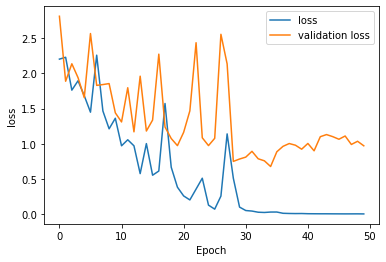

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

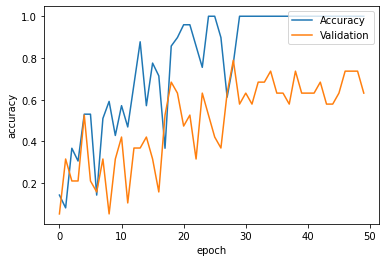

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

RMSprop seems a little eratic looking at the results of the accuracy and loss in the charts.  The loss and accuracy values seem to fluctuate wildly after each epoch. maybe this is not the best function.

<h2>Network 1b</h2><br>

1st network, 2 stacked hidden layers Dense activation relu. changed the optimiser to 'adam'

In [72]:
net1b = models.Sequential()
net1b.add(layers.Dense(480, input_shape = (480, 6)))    # input layer
net1b.add(layers.Dense(240, activation = 'relu'))       # 1st hidden layer
net1b.add(layers.Dense(120, activation = 'relu'))       # 2nd hidden layer
net1b.add(layers.Flatten())                             # alters the dimensionality of the output to match the labels shape
net1b.add(layers.Dense(7, activation = 'sigmoid'))         # output layer (tried relu doesn't work will use only sigmoid)

net1b.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_53 (Dense)             (None, 480, 240)          115440    
_________________________________________________________________
dense_54 (Dense)             (None, 480, 120)          28920     
_________________________________________________________________
flatten_13 (Flatten)         (None, 57600)             0         
_________________________________________________________________
dense_55 (Dense)             (None, 7)                 403207    
Total params: 550,927
Trainable params: 550,927
Non-trainable params: 0
_________________________________________________________________


In [73]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.shuffle_split(data, labels)

In [74]:
net1b.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history1b = net1b.fit(train_data, train_labels, epochs = 50, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/50
49/49 [==============================] - 1s 14ms/step - loss: 1.9869 - accuracy: 0.0816 - val_loss: 1.8592 - val_accuracy: 0.1579
Epoch 2/50
49/49 [==============================] - 0s 5ms/step - loss: 1.8552 - accuracy: 0.2041 - val_loss: 1.8015 - val_accuracy: 0.1579
Epoch 3/50
49/49 [==============================] - 0s 4ms/step - loss: 1.8062 - accuracy: 0.2041 - val_loss: 1.7214 - val_accuracy: 0.1579
Epoch 4/50
49/49 [==============================] - 0s 5ms/step - loss: 1.7172 - accuracy: 0.2449 - val_loss: 1.6030 - val_accuracy: 0.2632
Epoch 5/50
49/49 [==============================] - 0s 5ms/step - loss: 1.5585 - accuracy: 0.4082 - val_loss: 1.4394 - val_accuracy: 0.2632
Epoch 6/50
49/49 [==============================] - 0s 4ms/step - loss: 1.3841 - accuracy: 0.4082 - val_loss: 1.2676 - val_accuracy: 0.4737
Epoch 7/50
49/49 [==============================] - 0s 4ms/step - loss: 1.2086 - accuracy: 0.5306 - val_loss: 1.126

In [75]:
history_dict1b = history1b.history

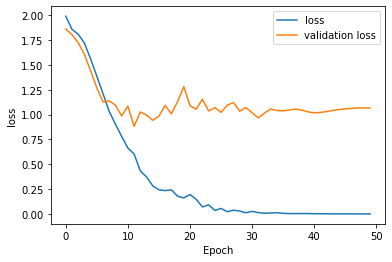

In [76]:
plt.plot(history1b.history['loss'])
plt.plot(history1b.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

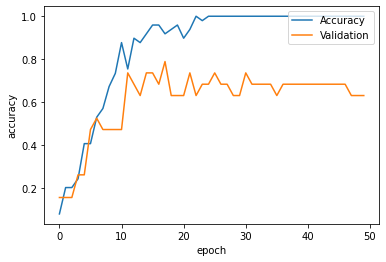

In [77]:
plt.plot(history1b.history['accuracy'])
plt.plot(history1b.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

with the adam optimiser the validation loss and accuracy seem much more stable you can even see where the model begins to overfit at around 10 epochs.  If I choose the adam optmiser I will use 10 epochs for each cycle.

<h2> Network 1c</h2><br>
sgd optimizer

In [78]:
net1c = models.Sequential()
net1c.add(layers.Dense(480, input_shape = (480, 6)))    # input layer
net1c.add(layers.Dense(240, activation = 'relu'))       # 1st hidden layer
net1c.add(layers.Dense(120, activation = 'relu'))       # 2nd hidden layer
net1c.add(layers.Flatten())                             # alters the dimensionality of the output to match the labels shape
net1c.add(layers.Dense(7, activation = 'sigmoid'))         # output layer (tried relu doesn't work will use only sigmoid)

net1c.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_57 (Dense)             (None, 480, 240)          115440    
_________________________________________________________________
dense_58 (Dense)             (None, 480, 120)          28920     
_________________________________________________________________
flatten_14 (Flatten)         (None, 57600)             0         
_________________________________________________________________
dense_59 (Dense)             (None, 7)                 403207    
Total params: 550,927
Trainable params: 550,927
Non-trainable params: 0
_________________________________________________________________


In [79]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.shuffle_split(data, labels)

In [80]:
net1c.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history1c = net1c.fit(train_data, train_labels, epochs = 50, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/50
49/49 [==============================] - 1s 12ms/step - loss: 1.9489 - accuracy: 0.1020 - val_loss: 1.9450 - val_accuracy: 0.0526
Epoch 2/50
49/49 [==============================] - 0s 4ms/step - loss: 1.9433 - accuracy: 0.1020 - val_loss: 1.9439 - val_accuracy: 0.0526
Epoch 3/50
49/49 [==============================] - 0s 4ms/step - loss: 1.9345 - accuracy: 0.2041 - val_loss: 1.9383 - val_accuracy: 0.0526
Epoch 4/50
49/49 [==============================] - 0s 4ms/step - loss: 1.9302 - accuracy: 0.2041 - val_loss: 1.9341 - val_accuracy: 0.0526
Epoch 5/50
49/49 [==============================] - 0s 5ms/step - loss: 1.9232 - accuracy: 0.2041 - val_loss: 1.9298 - val_accuracy: 0.0526
Epoch 6/50
49/49 [==============================] - 0s 5ms/step - loss: 1.9159 - accuracy: 0.2041 - val_loss: 1.9257 - val_accuracy: 0.0526
Epoch 7/50
49/49 [==============================] - 0s 6ms/step - loss: 1.9112 - accuracy: 0.2041 - val_loss: 1.922

In [81]:
history_dict1c = history1c.history

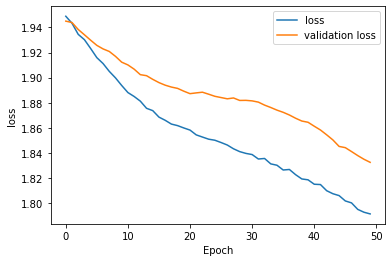

In [82]:
plt.plot(history1c.history['loss'])
plt.plot(history1c.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

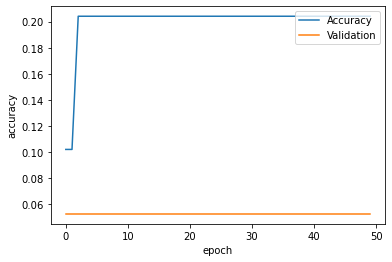

In [83]:
plt.plot(history1c.history['accuracy'])
plt.plot(history1c.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

With the sgd optimiser, the loss values seem to decrease at a steady rate but there is no improvement in the accuracy.